## Install the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
from collections import Counter
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split 

# Load Data

In [2]:
X, y = [], []
for i in range(1,7):
    emails = load_files(f"./data/enron{i}")
    X = np.append(X, emails.data)
    y = np.append(y, emails.target)

classes = emails.target_names

In [3]:
df_data = pd.DataFrame()
df_target = pd.DataFrame()
df_data['data'] = pd.DataFrame(X)
df_target['target'] = pd.DataFrame(y)

In [4]:
df_data.shape

(33715, 1)

In [5]:
df_target.shape

(33715, 1)

In [6]:
df_data.head()

,data
0,b'Subject: nesa / hea \' s 24 th annual meetin...
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...
2,"b""Subject: investor here .\r\nfrom : mr . rich..."
3,"b""Subject: hi paliourg all available meds . av..."
4,b'Subject: january nominations at shell deer p...


In [7]:
df_target.head()

,target
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [8]:
df_data["data"][0]

b'Subject: nesa / hea \' s 24 th annual meeting\r\nsaddle up for nesa / hea \' s 24 th annual meeting\r\n" deep in the heart of texas "\r\nseptember 9 - 11 , 2001\r\nhyatt regency hill country resort\r\nsan antonio , texas\r\nthe annual meeting planning committee has put together an outstanding\r\nprogram for your review . it is attached below in an adobe acrobat pdf file\r\n- if you have problems with the attachment please call nesa / hea\r\nheadquarters at ( 713 ) 856 - 6525 and we \' ll mail or fax a copy out immediately .\r\ngeneral session topics include :\r\n* will tomorrow \' s restructured electric infrastructure support\r\ntomorrow \' s economy ?\r\n* power deregulation panel : developer / ipp , utility / transmission , power\r\nmarketer , government , retail\r\n* power demand\r\n* the state of the energy industry\r\n* new political administration - impact on energy policy and\r\nenvironment\r\nnetworking opportunities :\r\n* opening reception - sunday , september 9\r\n* golf 

In [9]:
df_target["target"][0]

0.0

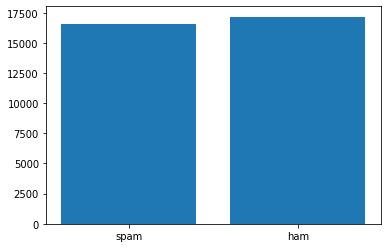

In [10]:
%matplotlib inline

plt.bar(Counter(y).keys(), Counter(y).values(),tick_label =('spam', 'ham'))
plt.show;

# Data Preprocessing

In [11]:
# Remove unneccesary characters
import re

def remove_expression(text):
    str_text = str(text)
    str_text = re.sub(r'\\r\\n', ' ', str_text)
    str_text = re.sub(r'\W', ' ', str_text)
    str_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', str_text)
    str_text = re.sub(r'\^[a-zA-Z]\s+', ' ', str_text) 
    str_text = re.sub(r'\s+', ' ', str_text, flags=re.I)
    str_text = re.sub(r'^b\s+', '', str_text)
    return str_text

df_data["clean_data_v1"] = df_data["data"].apply(lambda x:remove_expression(x))
df_data.head()

,data,clean_data_v1
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...


In [12]:
# Punctuation Removal: 
import string


#defining the function to remove punctuation
def remove_punctuation(text):
    str_text = str(text)
    punctuationfree="".join([i for i in str_text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df_data["clean_data_v2"] = df_data["clean_data_v1"].apply(lambda x:remove_punctuation(x))
df_data.head()


,data,clean_data_v1,clean_data_v2
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...


In [13]:
# Lowering the text
df_data['clean_data_v3']= df_data['clean_data_v2'].apply(lambda x: x.lower())
df_data.head()

,data,clean_data_v1,clean_data_v2,clean_data_v3
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...,subject nesa hea 24 th annual meeting saddle u...
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...,subject meter 1431 nov 1999 daren could you pl...
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...,subject investor here from mr richard mayer de...
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...,subject hi paliourg all available meds availab...
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...,subject january nominations at shell deer park...


In [14]:
#Tokenization

#defining function for tokenization
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

#applying function to the column
df_data['clean_data_v4']= df_data['clean_data_v3'].apply(lambda x: tokenization(x))

df_data.head()

,data,clean_data_v1,clean_data_v2,clean_data_v3,clean_data_v4
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...,subject nesa hea 24 th annual meeting saddle u...,"[subject, nesa, hea, 24, th, annual, meeting, ..."
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...,subject meter 1431 nov 1999 daren could you pl...,"[subject, meter, 1431, nov, 1999, daren, could..."
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...,subject investor here from mr richard mayer de...,"[subject, investor, here, from, mr, richard, m..."
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...,subject hi paliourg all available meds availab...,"[subject, hi, paliourg, all, available, meds, ..."
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...,subject january nominations at shell deer park...,"[subject, january, nominations, at, shell, dee..."


In [15]:
#Stop words removal
import nltk
#Stop words present in the library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s-verma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [17]:
#applying the function
df_data['clean_data_v5']= df_data['clean_data_v4'].apply(lambda x:remove_stopwords(x))
df_data.head()

,data,clean_data_v1,clean_data_v2,clean_data_v3,clean_data_v4,clean_data_v5
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...,subject nesa hea 24 th annual meeting saddle u...,"[subject, nesa, hea, 24, th, annual, meeting, ...","[subject, nesa, hea, 24, th, annual, meeting, ..."
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...,subject meter 1431 nov 1999 daren could you pl...,"[subject, meter, 1431, nov, 1999, daren, could...","[subject, meter, 1431, nov, 1999, daren, could..."
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...,subject investor here from mr richard mayer de...,"[subject, investor, here, from, mr, richard, m...","[subject, investor, mr, richard, mayer, dear, ..."
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...,subject hi paliourg all available meds availab...,"[subject, hi, paliourg, all, available, meds, ...","[subject, hi, paliourg, available, meds, avail..."
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...,subject january nominations at shell deer park...,"[subject, january, nominations, at, shell, dee...","[subject, january, nominations, shell, deer, p..."


In [18]:
#Stemming 

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df_data['clean_data_v6']=df_data['clean_data_v5'].apply(lambda x: stemming(x))

In [19]:
df_data.head()

,data,clean_data_v1,clean_data_v2,clean_data_v3,clean_data_v4,clean_data_v5,clean_data_v6
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...,subject nesa hea 24 th annual meeting saddle u...,"[subject, nesa, hea, 24, th, annual, meeting, ...","[subject, nesa, hea, 24, th, annual, meeting, ...","[subject, nesa, hea, 24, th, annual, meet, sad..."
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...,subject meter 1431 nov 1999 daren could you pl...,"[subject, meter, 1431, nov, 1999, daren, could...","[subject, meter, 1431, nov, 1999, daren, could...","[subject, meter, 1431, nov, 1999, daren, could..."
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...,subject investor here from mr richard mayer de...,"[subject, investor, here, from, mr, richard, m...","[subject, investor, mr, richard, mayer, dear, ...","[subject, investor, mr, richard, mayer, dear, ..."
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...,subject hi paliourg all available meds availab...,"[subject, hi, paliourg, all, available, meds, ...","[subject, hi, paliourg, available, meds, avail...","[subject, hi, paliourg, avail, med, avail, bin..."
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...,subject january nominations at shell deer park...,"[subject, january, nominations, at, shell, dee...","[subject, january, nominations, shell, deer, p...","[subject, januari, nomin, shell, deer, park, f..."


In [20]:
#join tokens

#defining the function to remove punctuation
def join_tokens(text):
    joinedStr=" ".join([i for i in text])
    return joinedStr

df_data['final_data']=df_data['clean_data_v6'].apply(lambda x: join_tokens(x))
df_data.head()


,data,clean_data_v1,clean_data_v2,clean_data_v3,clean_data_v4,clean_data_v5,clean_data_v6,final_data
0,b'Subject: nesa / hea \' s 24 th annual meetin...,Subject nesa hea 24 th annual meeting saddle u...,Subject nesa hea 24 th annual meeting saddle u...,subject nesa hea 24 th annual meeting saddle u...,"[subject, nesa, hea, 24, th, annual, meeting, ...","[subject, nesa, hea, 24, th, annual, meeting, ...","[subject, nesa, hea, 24, th, annual, meet, sad...",subject nesa hea 24 th annual meet saddl nesa ...
1,b'Subject: meter 1431 - nov 1999\r\ndaren -\r\...,Subject meter 1431 nov 1999 daren could you pl...,Subject meter 1431 nov 1999 daren could you pl...,subject meter 1431 nov 1999 daren could you pl...,"[subject, meter, 1431, nov, 1999, daren, could...","[subject, meter, 1431, nov, 1999, daren, could...","[subject, meter, 1431, nov, 1999, daren, could...",subject meter 1431 nov 1999 daren could pleas ...
2,"b""Subject: investor here .\r\nfrom : mr . rich...",Subject investor here from mr richard mayer de...,Subject investor here from mr richard mayer de...,subject investor here from mr richard mayer de...,"[subject, investor, here, from, mr, richard, m...","[subject, investor, mr, richard, mayer, dear, ...","[subject, investor, mr, richard, mayer, dear, ...",subject investor mr richard mayer dear friend ...
3,"b""Subject: hi paliourg all available meds . av...",Subject hi paliourg all available meds availab...,Subject hi paliourg all available meds availab...,subject hi paliourg all available meds availab...,"[subject, hi, paliourg, all, available, meds, ...","[subject, hi, paliourg, available, meds, avail...","[subject, hi, paliourg, avail, med, avail, bin...",subject hi paliourg avail med avail binaur cvo...
4,b'Subject: january nominations at shell deer p...,Subject january nominations at shell deer park...,Subject january nominations at shell deer park...,subject january nominations at shell deer park...,"[subject, january, nominations, at, shell, dee...","[subject, january, nominations, shell, deer, p...","[subject, januari, nomin, shell, deer, park, f...",subject januari nomin shell deer park fyi requ...


In [21]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_data['final_data'], df_target['target'], test_size=0.3)

## Model Training

In [22]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('classificador', MultinomialNB())])

clf_pipeline.fit(X_train, y_train)
predictions = clf_pipeline.predict(X_train)
score = accuracy_score(y_train,predictions)
print(f"Training Accuracy: {score*100:.2f}%")

predictions_test = clf_pipeline.predict(X_test)
score = accuracy_score(y_test, predictions_test)
print(f"Test Accuracy: {score*100:.2f}%")
print()

Training Accuracy: 99.02%
Test Accuracy: 98.49%



## Evaluation

In [23]:
from sklearn.metrics import precision_score, recall_score
print ("precision : " + str (precision_score(y_test, predictions_test)))
print ("recall : " + str (recall_score(y_test, predictions_test)))

precision : 0.9862216184746749
recall : 0.9841208365608056


# Prediction

In [36]:
def all_preprocessing(text):
    text = remove_expression(text)
    text = remove_punctuation(text)
    text = text.lower()
    text = tokenization(text)
    text = remove_stopwords(text)
    text = stemming(text)
    text = join_tokens(text)
    return text
    

In [56]:
test1 = "Do you want to earn money by these simple steps!"

predictions_test = clf_pipeline.predict([all_preprocessing(test1)])

if (predictions_test[0] >= 0.9):
    print("spam")
else:
    print("not spam")


spam


In [57]:
test2 = "Please share your updated resume for the next rounds of the interview"

predictions_test = clf_pipeline.predict([all_preprocessing(test2)])

if (predictions_test[0] >= 0.9):
    print("spam")
else:
    print("not spam")

not spam
